In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import  FuncFormatter
import yfinance as yf #importing Yahoo Finance Liberary
from datetime import date, timedelta

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r"C:\Users\Mohamed Fawzi\Desktop\Stock Market Analysis\stock_analysis.csv")
df

,Unnamed: 0,Date,Ticker,Company,Close,High,Low,Open,Volume,Year,Month Name,Month
0,0,2015-01-02,AAPL,Apple,24.347174,24.817059,23.906238,24.805924,212818400.0,2015,Jan,1
1,1,2015-01-02,AMZN,Amazon,15.426000,15.737500,15.348000,15.629000,55664000.0,2015,Jan,1
2,2,2015-01-02,GOOGL,Google,26.381865,26.693236,26.298664,26.533812,26480000.0,2015,Jan,1
3,3,2015-01-02,META,Meta Platforms,78.151466,78.629643,77.404320,78.280977,18177500.0,2015,Jan,1
4,4,2015-01-02,MSFT,Microsoft,40.152489,40.719226,39.963578,40.066621,27913900.0,2015,Jan,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15217,15217,2025-02-03,AMZN,Amazon,237.419998,239.250000,232.899994,234.059998,37186200.0,2025,Feb,2
15218,15218,2025-02-03,GOOGL,Google,201.229996,203.750000,200.100006,200.690002,27735600.0,2025,Feb,2
15219,15219,2025-02-03,META,Meta Platforms,697.460022,704.000000,675.250000,675.909973,21378500.0,2025,Feb,2
15220,15220,2025-02-03,MSFT,Microsoft,410.920013,415.410004,408.660004,411.600006,25580600.0,2025,Feb,2


In [34]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [35]:

df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15222 entries, 0 to 15221
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        15222 non-null  datetime64[ns]
 1   Ticker      15222 non-null  object        
 2   Company     15222 non-null  object        
 3   Close       15222 non-null  float64       
 4   High        15222 non-null  float64       
 5   Low         15222 non-null  float64       
 6   Open        15222 non-null  float64       
 7   Volume      15222 non-null  float64       
 8   Year        15222 non-null  int64         
 9   Month Name  15222 non-null  object        
 10  Month       15222 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 1.3+ MB


#  Descriptive Statistics

In [43]:
# Grouping by Company to compute key metrics
# and creating a new DataFrame for descriptive statistics
desc_stats = df.groupby('Company').agg(
    Avg_Close=('Close', 'mean'),
    Avg_Volume=('Volume', 'mean'),
    Start_Price=('Close', 'first'),
    End_Price=('Close', 'last')
).reset_index()


desc_stats

,Company,Avg_Close,Avg_Volume,Start_Price,End_Price
0,Amazon,102.286240,7.578681e+07,15.426000,237.419998
1,Apple,95.442205,1.166194e+08,24.347174,228.009995
2,Google,83.372676,3.509152e+07,26.381865,201.229996
3,Meta Platforms,224.919994,2.282444e+07,78.151466,697.460022
4,Microsoft,184.040083,2.883271e+07,40.152489,410.920013
5,NVIDIA,21.734074,4.662680e+08,0.483144,116.660004


In [44]:
# Calculating the percentage change for each company
desc_stats['Cumulative_Return'] = ((desc_stats['End_Price'] - desc_stats['Start_Price']) / desc_stats['Start_Price']) * 100

-   Cumulative return is a measure of the total percentage gain or loss an investment has experienced over a specific period. It shows how much an investment has grown (or declined) since the starting point, without considering the time factor.

## Average Closing
-   Comparison of the average closing prices for six major technology companies:

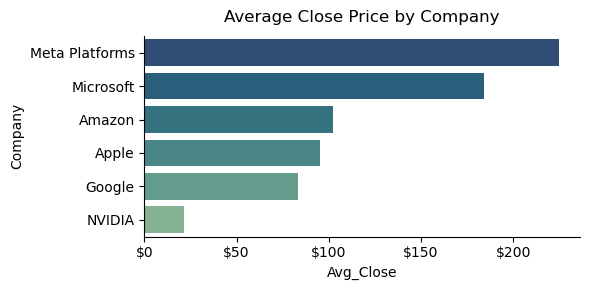

In [40]:

avg_close = desc_stats.sort_values(by='Avg_Close', ascending=False).copy()

plt.figure(figsize=(6, 3))

sns.barplot(data=avg_close,
            x='Avg_Close',
            y='Company',
            palette='crest_r',
           )


def curruncy_formatter(x, pos):
    if x >= 1e6:
        return f"${x / 1e6:.0f}M"
    else:
        return f"${x:.0f}"
    
# Format x-axis tick labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(curruncy_formatter))

plt.title('Average Close Price by Company', pad=10)

sns.despine()
plt.tight_layout()
plt.show()

### **Key Insights**
1. **Meta Platforms leads** with the highest average closing price, surpassing $250.
2. **Microsoft follows closely**, with its average closing price slightly above $200.
3. **Amazon sits in the mid-range**, around $150.
4. **Apple is just below Amazon**, with an average closing price near $125.
5. **Google's price is approximately $100**, placing it in the lower half of the group.
6. **NVIDIA has the lowest average closing price**, slightly above $50.

### **What This Tells Us**
- **Market Value & Investor Confidence**: Higher average closing prices suggest strong investor confidence and market dominance.
- **Meta & Microsoft Stand Out**: Their prices indicate that they hold a strong position in the tech industry, possibly due to successful product lines or strong revenue streams.
- **Amazon, Apple & Google**: These three show healthy stock values but trail behind the top two, reflecting their competitive yet fluctuating market presence.
- **NVIDIA's Position**: While its stock has the lowest closing price among these companies, NVIDIA remains a powerhouse in the semiconductor industry and could show future growth.


## Average Volume

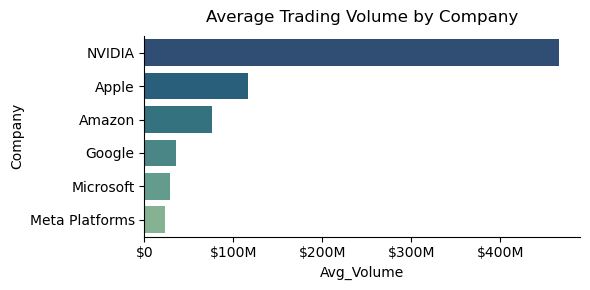

In [41]:

avg_volume = desc_stats.sort_values(by='Avg_Volume', ascending=False).copy()

plt.figure(figsize=(6, 3))
sns.barplot(data=avg_volume,
            x='Avg_Volume',
            y='Company',
            palette='crest_r',
           )
def curruncy_formatter(x, pos):
    if x >= 1e6:
        return f"${x / 1e6:.0f}M"
    else:
        return f"${x:.0f}"
    
# Format x-axis tick labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(curruncy_formatter))

  
plt.title('Average Trading Volume by Company', pad=10)

sns.despine()
plt.tight_layout()
plt.show() 

### **Key Insights:**
1. **NVIDIA leads in trading volume** with the highest average, exceeding $350M.
2. **Apple follows next**, showing strong trading activity around $300M.
3. **Amazon has significant volume**, slightly below Apple at approximately $250M.
4. **Google's trading volume** is positioned near $200M.
5. **Microsoft maintains steady trading**, averaging about $150M.
6. **Meta Platforms records the lowest trading volume**, below $100M.

### **What This Tells Us**
- **Investor Interest**: High trading volume indicates increased investor activity. NVIDIA and Apple are highly traded, possibly reflecting strong market confidence.
- **Amazon & Google See Consistent Action**: Their trading volume suggests active participation but at a slightly lower level compared to the leaders.
- **Microsoft & Meta Trade Less Frequently**: Lower trading volumes could indicate either less investor interest or fewer large transactions.



##  Cumulative Return

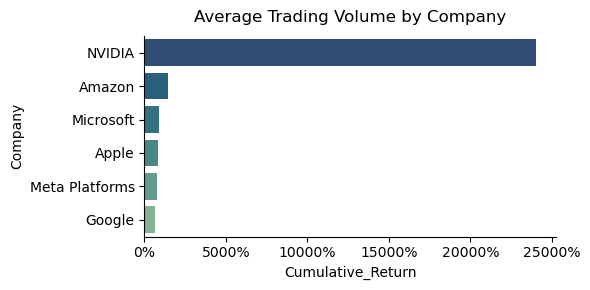

In [42]:

cumulative_return = desc_stats.sort_values(by='Cumulative_Return', ascending=False).copy()

plt.figure(figsize=(6, 3))
sns.barplot(data=cumulative_return,
            x='Cumulative_Return',
            y='Company',
            palette='crest_r',
           )

def perc_formatter(x, pos):
    if x >= 1e6:
        return f"${x / 1e3:.0f}K"
    else:
        return f"{x:.0f}%"
    
# Format x-axis tick labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(perc_formatter))
plt.title('Average Trading Volume by Company', pad=10)

sns.despine()
plt.tight_layout()
plt.show() 

### **Key Insights:**
1. **NVIDIA dominates cumulative returns** with a staggering percentage exceeding 250,000%.
2. **Amazon follows**, showing impressive growth but significantly below NVIDIA.
3. **Microsoft maintains strong returns**, placing third in the ranking.
4. **Apple and Meta Platforms display moderate cumulative returns**, but they still lag behind the top three.
5. **Google has the lowest cumulative return** among the six companies.

### **What This Tells Us**
- **Explosive Growth**: NVIDIA's extreme cumulative return suggests that it has seen massive price appreciation over time, likely driven by its dominance in AI and semiconductor advancements.
- **Amazon & Microsoft Hold Their Own**: These two companies have delivered strong returns, reflecting successful business strategies and market expansion.
- **Apple, Meta & Google**: While these firms remain highly influential, their cumulative returns are comparatively lower, possibly due to different growth trajectories or industry competition.

By looking at all three charts together—closing price, trading volume, and cumulative returns—it’s clear that NVIDIA has seen **extraordinary investor enthusiasm and price appreciation**. However, **Meta has the highest closing price but much lower cumulative returns**, suggesting it has remained relatively stable over time rather than experiencing explosive growth.


## Dialy Price Range Analysis

In [47]:
# Creating a new column for Daily Range
df['Daily_Range'] = df['High'] - df['Low']

In [56]:
# Creating a new DataFrame for daily range statistics
# Grouping by Company to compute daily range statistics
range_stats = df.groupby('Company').agg(
    Avg_daily_range=('Daily_Range', 'mean'),
    Max_daily_range=('Daily_Range', 'max')
).reset_index()

range_stats.sort_values(by='Avg_daily_range', ascending=False, inplace=True)

range_stats

,Company,Avg_daily_range,Max_daily_range
3,Meta Platforms,5.683099,38.770020
4,Microsoft,3.582725,24.326338
0,Amazon,2.422570,13.794998
1,Apple,1.965497,17.460558
2,Google,1.743282,10.759995
5,NVIDIA,0.836212,13.347945


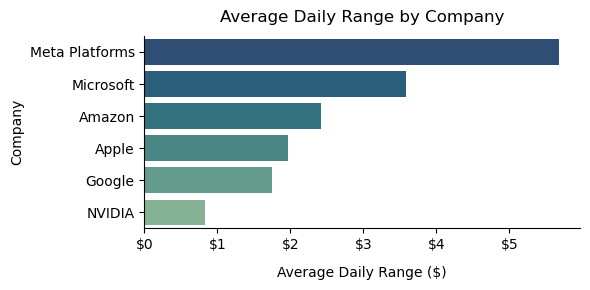

In [59]:
plt.figure(figsize=(6, 3))
sns.barplot(data=range_stats,
            x='Avg_daily_range',
            y='Company',
            palette='crest_r',
           )

def curruncy_formatter(x, pos):
    if x >= 1e6:
        return f"${x / 1e6:.0f}M"
    else:
        return f"${x:.0f}"
    
# Format x-axis tick labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(curruncy_formatter))

  
plt.title('Average Daily Range by Company', pad=10)
plt.xlabel('Average Daily Range ($)', labelpad=10)

sns.despine()
plt.tight_layout()
plt.show() 




### **Key Findings**
1. **Meta Platforms has the highest daily range**, exceeding **$5**, indicating substantial price fluctuations.
2. **Microsoft follows closely**, with an average daily range slightly above **$4**.
3. **Amazon displays strong movement**, around **$3.50**, suggesting notable intraday price shifts.
4. **Apple’s range is close to $3**, reflecting steady yet significant volatility.
5. **Google’s daily range is approximately $2.50**, placing it on the lower end.
6. **NVIDIA records the lowest daily range**, slightly above **$1**, showing the least volatility among the six.

### **What This Tells Us**
- **High Volatility Stocks (Meta, Microsoft, Amazon)**: These stocks experience more significant daily price changes, which might appeal to traders looking for short-term opportunities.
- **Moderate Volatility (Apple, Google)**: Their price movements are less extreme but still provide trading opportunities.
- **Lower Volatility (NVIDIA)**: With a smaller daily range, NVIDIA's stock exhibits more stability, making it potentially less risky for short-term investors.


## Volatility Analysis
-   Volatility: The Measure of Market Movement
Volatility refers to how much and how quickly the price of a stock, asset, or market index fluctuates. It’s a key indicator of risk and uncertainty, often used by traders and investors to gauge how stable or unpredictable an investment is.


How It's Measured
- Standard Deviation – Calculates the average deviation from the mean price.
- Average True Range (ATR) – Measures the average daily price range over a set period.




In [62]:
# Volatility Analysis (Standard Deviation)
volatility = df.groupby('Company')['Close'].std().reset_index(name='Volatility')

volatility.sort_values(by='Volatility', ascending=False, inplace=True)
volatility

,Company,Volatility
3,Meta Platforms,126.676460
4,Microsoft,125.346820
1,Apple,66.685646
0,Amazon,55.171431
2,Google,44.634084
5,NVIDIA,33.814516


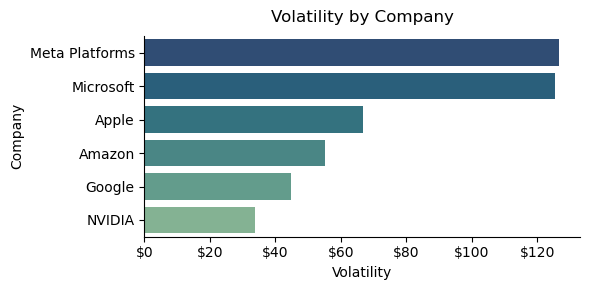

In [ ]:
plt.figure(figsize=(6, 3))
sns.barplot(data=volatility,
            x='Volatility',
            y='Company',
            palette='crest_r',
           )


def curruncy_formatter(x, pos):
    if x >= 1e6:
        return f"${x / 1e6:.0f}M"
    else:
        return f"${x:.0f}"
    
# Format x-axis tick labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(curruncy_formatter))

plt.title('Volatility by Company', pad=10)

sns.despine()
plt.tight_layout()
plt.show()

### **Key Observations**
1. **Meta Platforms has the highest volatility**, exceeding **$100**, indicating significant price swings.
2. **Microsoft follows**, with volatility slightly above **$90**.
3. **Apple shows considerable movement**, around **$80**.
4. **Amazon has a volatility level of approximately **$70**, reflecting steady price shifts.
5. **Google's volatility is lower**, near **$60**.
6. **NVIDIA records the lowest volatility**, slightly above **$50**, suggesting more stability compared to the other five.

### **What This Means**
- **Higher volatility (Meta, Microsoft, Apple)**: These stocks experience frequent large price swings, which could indicate greater investor interest and short-term trading opportunities.
- **Moderate volatility (Amazon, Google)**: These stocks see price movements but are relatively steadier than the top three.
- **Lower volatility (NVIDIA)**: NVIDIA's price remains more stable in comparison, which could mean less short-term risk but also fewer dramatic gains.



## Correlation Matrix

In [91]:
# 5. Correlation Matrix
pivot_df = df.pivot(index='Date', columns='Company', values='Close')
correlation_matrix = pivot_df.corr()


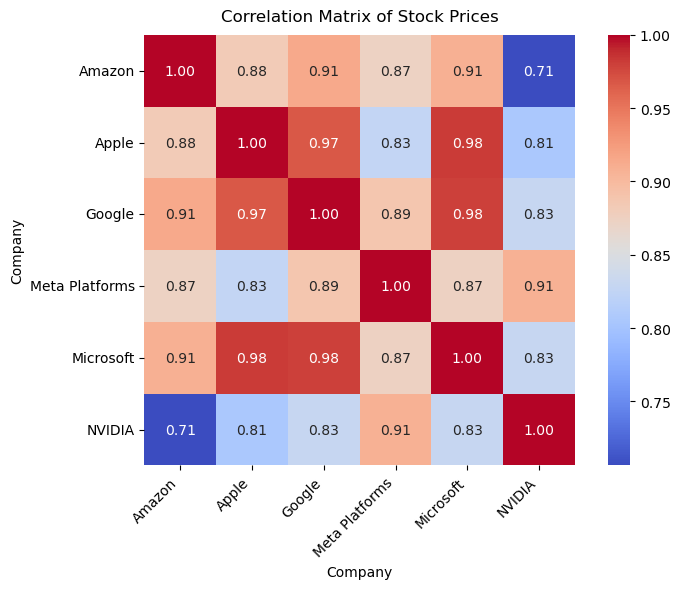

In [93]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            cbar=True, 
            square=True
)


plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix of Stock Prices', pad=10)
plt.tight_layout()
plt.show()


### **Key Findings**
1. **Strongest Correlations**:
   - **Microsoft & Apple (0.98)**: These two stocks move closely together, likely due to their similar market behavior in the tech industry.
   - **Google & Microsoft (0.98)**: Shows a strong relationship between their price movements.
   - **Apple & Google (0.97)**: These two companies have a significant positive correlation, indicating they tend to rise or fall together.

2. **Moderate Correlations**:
   - **Amazon & Google (0.91)**: Their stock movements are strongly linked but slightly less than Microsoft & Apple.
   - **Meta Platforms & Google (0.89)**: Suggests that Meta's price movements are influenced by Google's performance.
   - **Meta & NVIDIA (0.91)**: Indicates some alignment, likely due to AI and tech sector trends.

3. **Lowest Correlation**:
   - **Amazon & NVIDIA (0.71)**: While still positively correlated, their prices don’t move as closely together compared to the others.
   - **Meta & Apple (0.83)**: A weaker relationship than the others, indicating Meta’s stock may move independently from Apple’s trends.

### **What This Means**
- **Highly correlated stocks move in similar directions**, making them ideal for investors who want diversified tech exposure.
- **Lower correlations suggest independent price movements**, which might be beneficial for risk management in a portfolio.
- **NVIDIA has the most independent movement**, likely due to its strong presence in the semiconductor industry rather than cloud computing and consumer tech.


## Daily Returns Analysis

In [140]:
# Daily Returns
# Calculate daily returns
returns_df = pivot_df.pct_change().reset_index()
returns_df = returns_df.dropna()
returns_df.columns.name = 'Company' # Set the index name to 'Date'
# Melt the DataFrame to long format for easier plotting
returns_df_melted = returns_df.melt(id_vars='Date', var_name='Company', value_name='Daily_Return')
returns_df_melted['Year'] = returns_df_melted['Date'].dt.year
returns_df_melted['Month'] = returns_df_melted['Date'].dt.month
returns_df_melted['Day'] = returns_df_melted['Date'].dt.day
df_Apple = returns_df_melted[returns_df_melted['Company'] == 'Apple']
df_Amazon = returns_df_melted[returns_df_melted['Company'] == 'Amazon']
df_Microsoft = returns_df_melted[returns_df_melted['Company'] == 'Microsoft']
df_Tesla = returns_df_melted[returns_df_melted['Company'] == 'Tesla']
df_Google = returns_df_melted[returns_df_melted['Company'] == 'Google']

df_Apple.head()


,Date,Company,Daily_Return,Year,Month,Day
2536,2015-01-05,Apple,-0.028172,2015,1,5
2537,2015-01-06,Apple,0.000094,2015,1,6
2538,2015-01-07,Apple,0.014023,2015,1,7
2539,2015-01-08,Apple,0.038422,2015,1,8
2540,2015-01-09,Apple,0.001073,2015,1,9


In [142]:
df_Apple = df_Apple[df_Apple['Year'].isin([2023, 2024])]

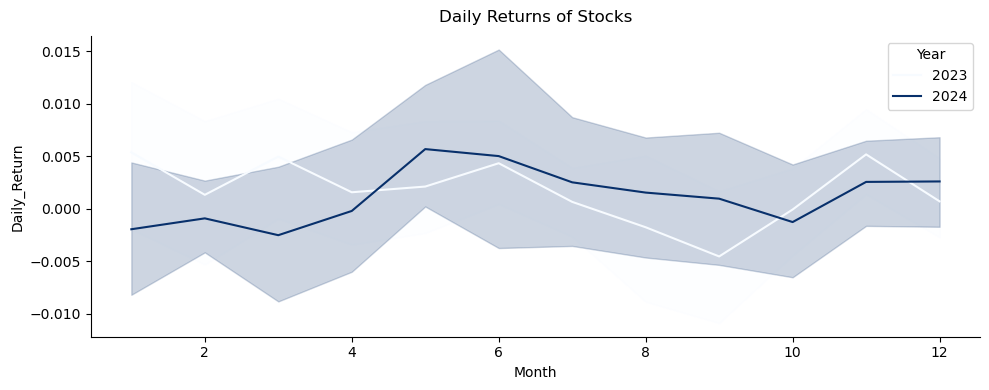

In [151]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_Apple, 
             x='Month', 
             y='Daily_Return', 
             hue='Year', 
             palette='Blues'
             )


plt.title('Daily Returns of Stocks', pad=10)

sns.despine()
plt.tight_layout()
plt.show()

## Volume-Price Relationship

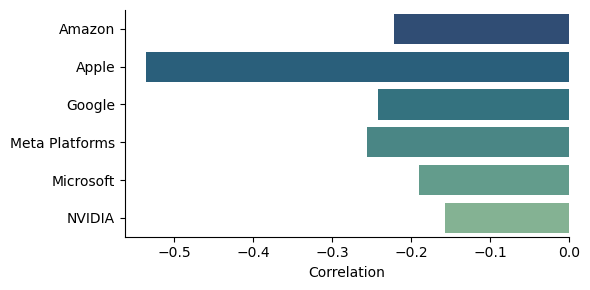

In [117]:
volume_price_corr = df.groupby('Company')[['Volume', 'Close']].corr().unstack().iloc[:,1]

volume_price_corr = volume_price_corr.reset_index()
volume_price_corr.columns = ['Company', 'Correlation']

plt.figure(figsize=(6, 3))
sns.barplot(data=volume_price_corr,
            x='Correlation',
            y='Company',
            palette='crest_r',
           )


plt.ylabel('')

sns.despine()
plt.tight_layout()
plt.show()